In [1]:
import sys
sys.path.append('/usr/src/gym4real')  # <-- path to the *parent* of gym4real

import gym4real.envs.robofeeder.Env_1 as env
import matplotlib.pyplot as plt
from stable_baselines3.common.env_checker import check_env

### Init

In [6]:
env = env.robotEnv("/usr/src/gym4real/gym4real/envs/robofeeder/configuration.yaml")

/usr/local/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


In [3]:
check_env(env, warn=True)

/home/giuseppe/.local/lib/python3.10/site-packages/stable_baselines3/common/env_checker.py:30: UserWarning: It seems that your observation  is an image but its `dtype` is (float32) whereas it has to be `np.uint8`. If your observation is not an image, we recommend you to flatten the observation to have only a 1D vector
  warnings.warn(
/home/giuseppe/.local/lib/python3.10/site-packages/stable_baselines3/common/env_checker.py:38: UserWarning: It seems that your observation space  is an image but the upper and lower bounds are not in [0, 255]. Because the CNN policy normalize automatically the observation you may encounter issue if the values are not in that range.
  warnings.warn(


#### Utilites

In [7]:
def printobs():
    plt.figure(figsize=(10, 5))
    plt.imshow(env.current_obs.reshape(env.CROP_DIM,env.CROP_DIM),cmap=plt.cm.gray)
    plt.show()

### Random Action


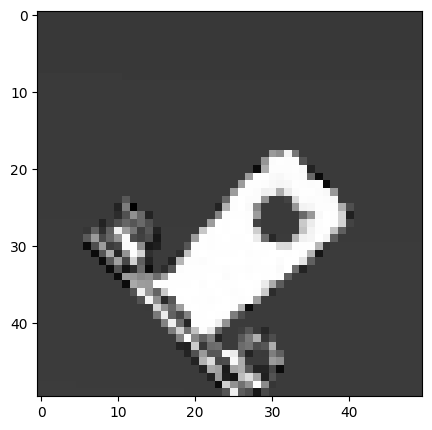

Initial Joint Position: [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Object Position: [-0.29151979  0.34567667  0.08222582]


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (300, 300) to (304, 304) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video saved to /usr/src/gym4real/gym4real/envs/robofeeder/recordings/simulated_pick_1.mp4
done: False
reward: -1 



In [11]:
_,_ = env.reset()
# perform a random action
printobs()
action = env.action_space.sample()
obs,rew,done,_ ,_= env.step(action)

print("done:",done) 
print("reward:",rew,"\n")

if(done): env.reset()

# print the obs after the action


In [12]:
import os
from IPython.display import HTML

if env.simulator.configs["IS_SIMULATION_RECORD"]:
    # Construct video path
    video_name = f"simulated_pick_{env.simulator.counter}.mp4"
    video_path = os.path.join(env.simulator.configs["RECORD_FOLDER"], video_name)
    
    display(HTML(f"""
    <div style="text-align: center;">
        <video width="300" height="300" controls>
            <source src="{video_path}" type="video/mp4">
            Your browser does not support the video tag.
        </video>
    </div>
    """))